<a href="https://colab.research.google.com/github/Thandiwe-Khalaki/load-shortfall-regression-predict-api/blob/master/Spain_Electricity_Shortfall_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Thandiwe, Khalaki**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import matplotlib.dates as dates

# Libraries for data preparation and model building
from sklearn import linear_model

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df_train = pd.read_csv('/content/df_train.csv', index_col = 'time', parse_dates=['time'],infer_datetime_format=True)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
df_train.head()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
2015-01-01 06:00:00,1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2015-01-01 09:00:00,2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
2015-01-01 12:00:00,3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
2015-01-01 15:00:00,4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8763 entries, 2015-01-01 03:00:00 to 2017-12-31 21:00:00
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null 

In [ ]:
df_train.isnull().sum()

Unnamed: 0                 0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_tem

## 3.1  Look at data statistics


In [ ]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

In [ ]:
df_train.describe(include=['object'])

,Valencia_wind_deg,Seville_pressure
count,8763,8763
unique,10,25
top,level_1,sp13
freq,1072,500


In [ ]:
df_train['Seville_pressure']

time
2015-01-01 03:00:00    sp25
2015-01-01 06:00:00    sp25
2015-01-01 09:00:00    sp25
2015-01-01 12:00:00    sp25
2015-01-01 15:00:00    sp25
                       ... 
2017-12-31 09:00:00    sp23
2017-12-31 12:00:00    sp23
2017-12-31 15:00:00    sp22
2017-12-31 18:00:00    sp23
2017-12-31 21:00:00    sp25
Name: Seville_pressure, Length: 8763, dtype: object

## 3.2 Plot relevant feature interactions

In [ ]:
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [ ]:
wind_degree = df_train[['Valencia_wind_deg','Bilbao_wind_deg','Barcelona_wind_deg']]
wind_degree

,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
time,,,
2015-01-01 03:00:00,level_5,223.333333,42.666667
2015-01-01 06:00:00,level_10,221.000000,139.000000
2015-01-01 09:00:00,level_9,214.333333,326.000000
2015-01-01 12:00:00,level_8,199.666667,273.000000
2015-01-01 15:00:00,level_7,185.000000,260.000000
...,...,...,...
2017-12-31 09:00:00,level_6,226.666667,83.666667
2017-12-31 12:00:00,level_6,220.000000,213.333333
2017-12-31 15:00:00,level_9,283.333333,256.666667


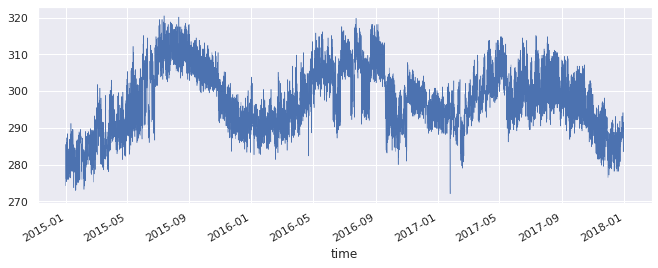

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
df_train['Seville_temp_max'].plot(linewidth=0.5);


In [ ]:
#set temprtature
temp_max = df_train[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max']]
temp = df_train[['Seville_temp','Bilbao_temp','Barcelona_temp','Valencia_temp','Madrid_temp']]
temp_min = df_train[['Seville_temp_min','Bilbao_temp_min','Barcelona_temp_min','Valencia_temp_min','Madrid_temp_min']]


0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Name: month, Length: 8763, dtype: bool

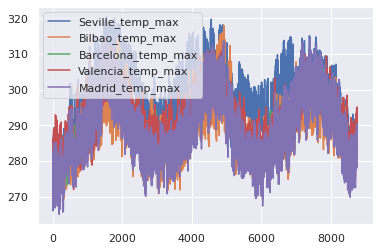

In [ ]:
temp_max.plot()


,month,Seville_temp_max
0,1.0,274.254667
1,1.0,274.945000
2,1.0,278.792000
3,1.0,285.394000
4,1.0,285.513719
...,...,...
8758,12.0,285.483333
8759,12.0,288.483333
8760,12.0,291.483333
8761,12.0,291.483333


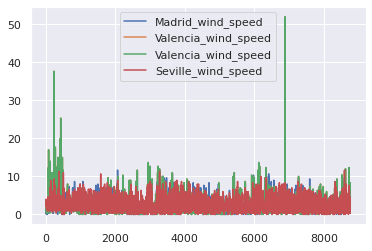

In [ ]:
viz = df_train[['Madrid_wind_speed','Valencia_wind_speed','Valencia_wind_speed','Seville_wind_speed']]
viz.plot()
pyplot.show()

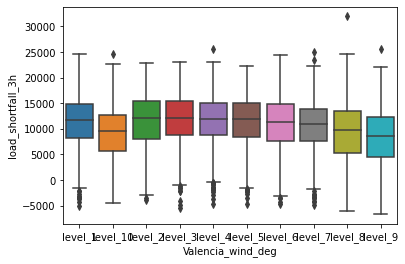

In [ ]:
sns.boxplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=df_train)

In [ ]:
sns.boxplot(x="Seville_pressure", y="load_shortfall_3h", data=df_train)

## 3.3 Evaluate correlation

In [ ]:
#get year,month,week,days,hours from time column and convert them to int
df_train['year'] = pd.DatetimeIndex(df_train['time']).year
df_train['month'] = pd.DatetimeIndex(df_train['time']).month
df_train['week'] = pd.DatetimeIndex(df_train['time']).week
df_train['weekdays'] = pd.DatetimeIndex(df_train['time']).weekday
df_train['hour'] = pd.DatetimeIndex(df_train['time']).hour

#change the datatype to float, useful for regression
df_train['year']= df_train['year'].astype('float')
df_train['month']= df_train['month'].astype('float')
df_train['week']= df_train['week'].astype('float')
df_train['weekdays']= df_train['weekdays'].astype('float')
df_train['hour']= df_train['hour'].astype('float')

df_train[['year','month','week','weekdays','hour']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


,year,month,week,weekdays,hour
0,2015.0,1.0,1.0,3.0,3.0
1,2015.0,1.0,1.0,3.0,6.0
2,2015.0,1.0,1.0,3.0,9.0
3,2015.0,1.0,1.0,3.0,12.0
4,2015.0,1.0,1.0,3.0,15.0


In [ ]:
#corelation between time and load_shortfall
Time = df_train[['year','month','week','weekdays','hour','time','load_shortfall_3h']].corr()
Time

,year,month,week,weekdays,hour,load_shortfall_3h
year,1.000000,-0.001039,-0.012764,1.677021e-03,2.748198e-04,0.131324
month,-0.001039,1.000000,0.975848,1.458431e-04,3.013643e-04,0.199048
week,-0.012764,0.975848,1.000000,-4.752887e-03,3.170587e-04,0.201080
weekdays,0.001677,0.000146,-0.004753,1.000000e+00,6.141191e-07,-0.156510
hour,0.000275,0.000301,0.000317,6.141191e-07,1.000000e+00,0.139285
load_shortfall_3h,0.131324,0.199048,0.201080,-1.565103e-01,1.392854e-01,1.000000


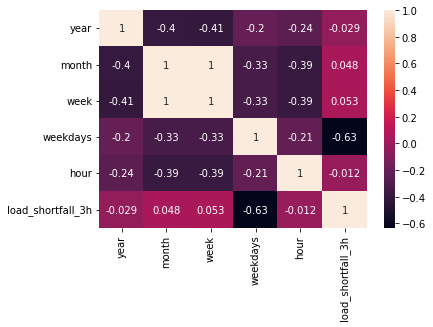

In [ ]:
sns.heatmap(Time.corr(), annot=True)

In [ ]:
wind_speed = df_train[['Madrid_wind_speed','Valencia_wind_speed','Bilbao_wind_speed','Seville_wind_speed','Barcelona_wind_speed','load_shortfall_3h']].corr()
wind_speed

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Seville_wind_speed,Barcelona_wind_speed,load_shortfall_3h
Madrid_wind_speed,1.000000,0.513092,0.377854,0.434104,0.294640,-0.150981
Valencia_wind_speed,0.513092,1.000000,0.386478,0.316035,0.347966,-0.142791
Bilbao_wind_speed,0.377854,0.386478,1.000000,0.213420,0.275317,-0.081602
Seville_wind_speed,0.434104,0.316035,0.213420,1.000000,0.212193,-0.048433
Barcelona_wind_speed,0.294640,0.347966,0.275317,0.212193,1.000000,-0.103633
load_shortfall_3h,-0.150981,-0.142791,-0.081602,-0.048433,-0.103633,1.000000


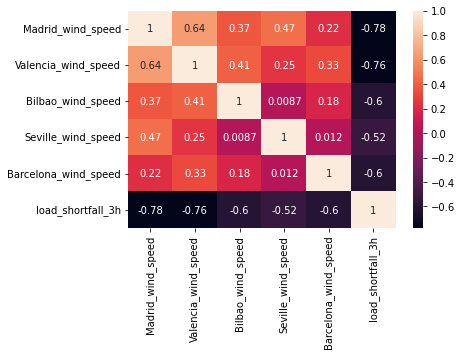

In [ ]:
sns.heatmap(wind_speed.corr(), annot= True)

In [ ]:
#correlation between high temperature and load_shortfall
temp_max = df_train[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max','load_shortfall_3h']].corr()
temp_max

,Seville_temp_max,Bilbao_temp_max,Barcelona_temp_max,Valencia_temp_max,Madrid_temp_max,load_shortfall_3h
Seville_temp_max,1.000000,0.726510,0.738489,0.771964,0.772369,0.109834
Bilbao_temp_max,0.726510,1.000000,0.844563,0.837574,0.846887,0.180934
Barcelona_temp_max,0.738489,0.844563,1.000000,0.918256,0.906248,0.164734
Valencia_temp_max,0.771964,0.837574,0.918256,1.000000,0.917838,0.144270
Madrid_temp_max,0.772369,0.846887,0.906248,0.917838,1.000000,0.182548
load_shortfall_3h,0.109834,0.180934,0.164734,0.144270,0.182548,1.000000


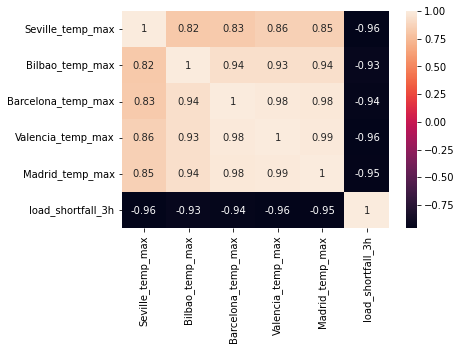

In [ ]:
sns.heatmap(temp_max.corr(), annot = True)

In [ ]:
pressure = df_train[['Seville_pressure','Bilbao_pressure','Barcelona_pressure','Valencia_pressure','Madrid_pressure','load_shortfall_3h']].corr()
pressure

,Bilbao_pressure,Barcelona_pressure,Valencia_pressure,Madrid_pressure,load_shortfall_3h
Bilbao_pressure,1.000000,-0.014092,0.534284,0.434461,0.039052
Barcelona_pressure,-0.014092,1.000000,-0.007790,-0.091181,-0.034385
Valencia_pressure,0.534284,-0.007790,1.000000,0.799272,0.086022
Madrid_pressure,0.434461,-0.091181,0.799272,1.000000,0.092638
load_shortfall_3h,0.039052,-0.034385,0.086022,0.092638,1.000000


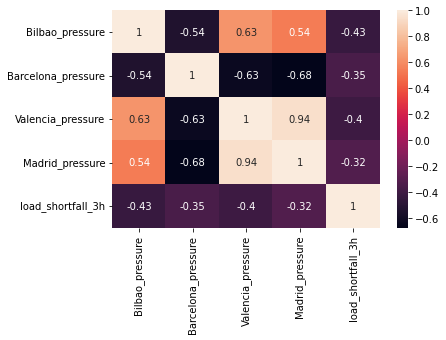

In [ ]:
sns.heatmap(pressure.corr(), annot= True)

In [ ]:
temp = df_train[['Seville_temp','Bilbao_temp','Barcelona_temp','Valencia_temp','Madrid_temp','load_shortfall_3h']].corr()
temp

,Seville_temp,Bilbao_temp,Barcelona_temp,Valencia_temp,Madrid_temp,load_shortfall_3h
Seville_temp,1.000000,0.839014,0.852651,0.887040,0.917075,0.159343
Bilbao_temp,0.839014,1.000000,0.865705,0.854892,0.875271,0.176411
Barcelona_temp,0.852651,0.865705,1.000000,0.914601,0.903143,0.182673
Valencia_temp,0.887040,0.854892,0.914601,1.000000,0.915753,0.173225
Madrid_temp,0.917075,0.875271,0.903143,0.915753,1.000000,0.186036
load_shortfall_3h,0.159343,0.176411,0.182673,0.173225,0.186036,1.000000


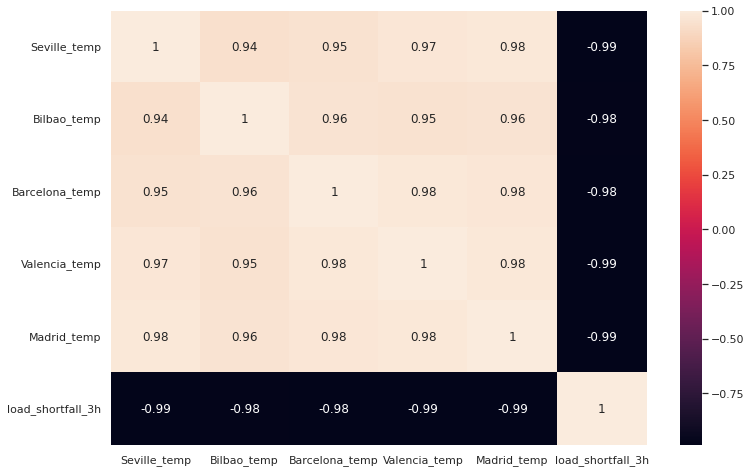

In [ ]:
sns.heatmap(temp.corr(), annot = True)

In [ ]:
 pearson_coef, p_value = stats.pearsonr(df_train['hour'], df_train['load_shortfall_3h'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.13928541804626302  with a P-value of P = 3.2633595181259146e-39


## 3.4 Feature distributions

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic